In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.isnull().sum(),test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Data Visualization

In [11]:
def bar_chart(colunm):
    survived = train[train['Survived']==1][colunm].value_counts()
    dead = train[train['Survived']==0][colunm].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar')

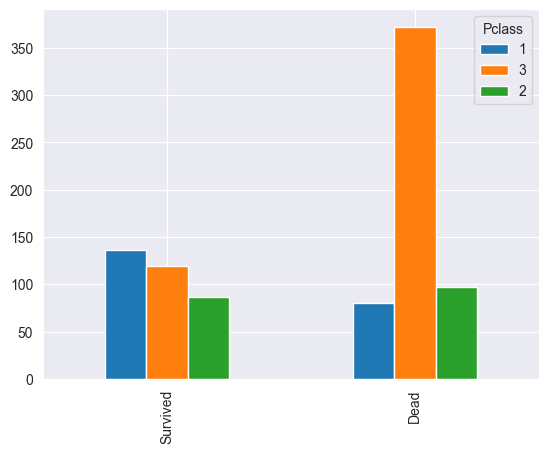

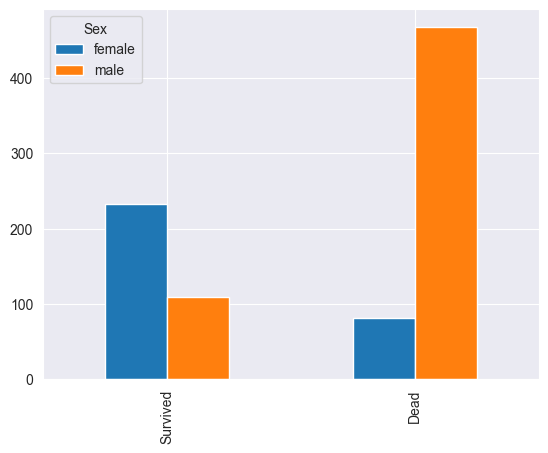

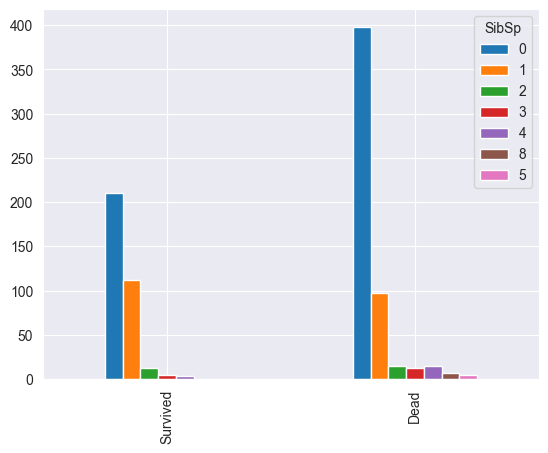

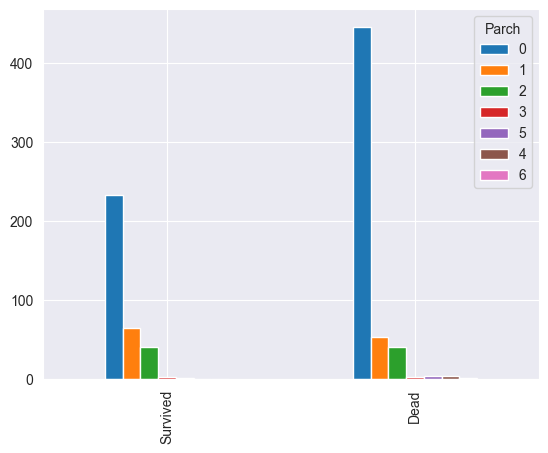

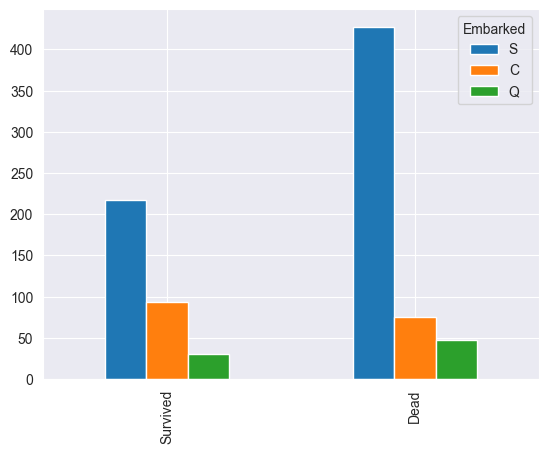

In [12]:
bar_chart('Pclass')
bar_chart('Sex')
bar_chart('SibSp')
bar_chart('Parch')
bar_chart('Embarked')

### Fill NaN

In [13]:
train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())

In [14]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

/var/folders/0y/66l4_rn13874sjls77zy4j840000gn/T/ipykernel_46641/3523348150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
/var/folders/0y/66l4_rn13874sjls77zy4j840000gn/T/ipykernel_46641/3523348150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.fit_transform(test['Sex'])

In [16]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
train['Embarked'] = le.fit_transform(train['Embarked'])
test['Embarked'] = le.fit_transform(test['Embarked'])

In [17]:
features_drop = ['Ticket', 'SibSp', 'Parch','Cabin','Name']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [18]:
train.drop(['PassengerId'], axis=1).head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [19]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,1,34.5,7.8292,1
1,893,3,0,47.0,7.0000,2
2,894,2,1,62.0,9.6875,1
3,895,3,1,27.0,8.6625,2
4,896,3,0,22.0,12.2875,2


In [20]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
train_data.shape, target.shape

((891, 6), (891,))

In [21]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=30, shuffle=True, random_state=0)

### RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf_1 = RandomForestClassifier(n_estimators=100, random_state=0)
scoring = 'accuracy'
score = cross_val_score(clf_1, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86666667 0.76666667 0.83333333 0.9        0.83333333 0.76666667
 0.8        0.83333333 0.7        0.8        0.8        0.8
 0.86666667 0.8        0.86666667 0.83333333 0.86666667 0.76666667
 0.86666667 0.83333333 0.86666667 0.82758621 0.79310345 0.79310345
 0.79310345 0.82758621 0.82758621 0.86206897 0.68965517 0.86206897]


In [23]:
round(np.mean(score)*100, 2)

np.float64(81.81)

### Support Vector Machine

In [24]:
from sklearn.svm import SVC
clf_2 = SVC()
scoring = 'accuracy'
score = cross_val_score(clf_2, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.66666667 0.66666667 0.6        0.63333333 0.86666667 0.66666667
 0.66666667 0.66666667 0.7        0.63333333 0.63333333 0.66666667
 0.73333333 0.76666667 0.63333333 0.66666667 0.7        0.66666667
 0.66666667 0.76666667 0.53333333 0.62068966 0.75862069 0.65517241
 0.55172414 0.55172414 0.68965517 0.68965517 0.48275862 0.51724138]


In [25]:
round(np.mean(score)*100,2)

np.float64(65.72)

### Final Test

In [27]:
train_data = train.drop(["Survived", "PassengerId"], axis=1)
target = train["Survived"]

model = RandomForestClassifier(n_estimators=13, random_state=42)
model.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()

prediction = model.predict(test_data)

submit = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submit.to_csv('Final_Submission.csv', index=False)
print(submit.head())


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         1
